In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

city_temp = pd.read_csv('city_data.csv')
city_list = pd.read_csv('city_list.csv')
global_temp = pd.read_csv('global_data.csv')

In [226]:
city_temp.head(10)

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN
5,1854,Abidjan,Côte D'Ivoire,NaN
6,1855,Abidjan,Côte D'Ivoire,NaN
7,1856,Abidjan,Côte D'Ivoire,26.28
8,1857,Abidjan,Côte D'Ivoire,25.17
9,1858,Abidjan,Côte D'Ivoire,25.49


In [227]:
city_temp.shape

(71311, 4)

In [228]:
city_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [229]:
city_temp.isnull().sum()

year           0
city           0
country        0
avg_temp    2547
dtype: int64

In [230]:
city_temp[city_temp['avg_temp'].isnull()]

,year,city,country,avg_temp
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN
5,1854,Abidjan,Côte D'Ivoire,NaN
6,1855,Abidjan,Côte D'Ivoire,NaN
14,1863,Abidjan,Côte D'Ivoire,NaN
...,...,...,...,...
70870,1749,Zagreb,Croatia,NaN
71137,1840,Zapopan,Mexico,NaN
71138,1841,Zapopan,Mexico,NaN
71139,1842,Zapopan,Mexico,NaN


In [231]:
city_list.head(10)

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey
5,Adelaide,Australia
6,Agra,India
7,Ahmadabad,India
8,Albuquerque,United States
9,Alexandria,Egypt


In [232]:
city_list.shape

(345, 2)

In [233]:
city_list.isnull().sum()

city       0
country    0
dtype: int64

In [234]:
global_temp.head(10)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


In [235]:
global_temp.shape

(266, 2)

In [236]:
global_temp.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


In [237]:
global_temp.isnull().sum()

year        0
avg_temp    0
dtype: int64

### Findings
- city_temp contains the average temperatures from various cities from 1743 to 2013. There are some cities with missing temperatures
- city_list contains a list of cities and its countries
- global_temp contains the global average temperature from 1750 to 2015

In [238]:
city_temp.dropna(inplace=True)

- Dropping years with nulls average temperature

In [239]:
city_temp[city_temp['country'] == 'Brazil']['city'].value_counts()

Belo Horizonte    175
Curitiba          175
Campinas          175
Colombo           175
Rio De Janeiro    175
Porto Alegre      175
Manaus            175
Guarulhos         175
Salvador          175
Recife            168
Fortaleza         139
Name: city, dtype: int64

In [242]:
campinas_temp = city_temp[city_temp['city'] == 'Campinas'].drop(columns=['city', 'country'])

In [243]:
campinas_temp

,year,avg_temp
12973,1832,18.94
12974,1833,19.93
12975,1834,19.21
12976,1835,18.62
12977,1836,18.84
...,...,...
13150,2009,20.78
13151,2010,20.72
13152,2011,20.33
13153,2012,21.02


In [244]:
campinas_temp['MA'] = campinas_temp.iloc[:,1].rolling(window=7).mean()

In [245]:
campinas_temp.describe()

,year,avg_temp,MA
count,175.000000,175.000000,169.000000
mean,1925.520000,19.700057,19.695554
std,51.463617,0.593897,0.446563
min,1832.000000,18.280000,18.724286
25%,1882.500000,19.245000,19.397143
50%,1926.000000,19.700000,19.627143
75%,1969.500000,20.090000,19.941429
max,2013.000000,21.300000,20.768571


In [246]:
global_temp['MA'] = global_temp.iloc[:,1].rolling(window=7).mean()

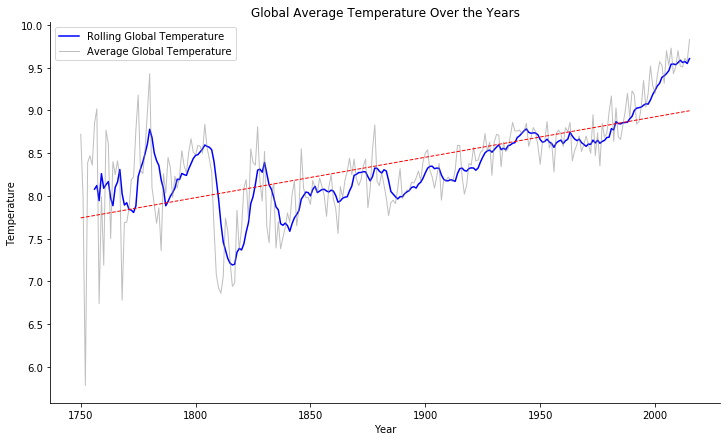

In [300]:
fig = plt.figure(figsize=(12,7))

plt.plot(global_temp['year'], global_temp['MA'], c='blue', label='Rolling Global Temperature')
plt.plot(global_temp['year'], global_temp['avg_temp'], c='gray',linewidth=1, alpha=0.5, label='Average Global Temperature')

plt.title('Global Average Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

z = np.polyfit(global_temp['year'],global_temp['avg_temp'], 1)
p = np.poly1d(z)
plt.plot(global_temp['year'], p(global_temp['year']) ,"r--", linewidth=1)

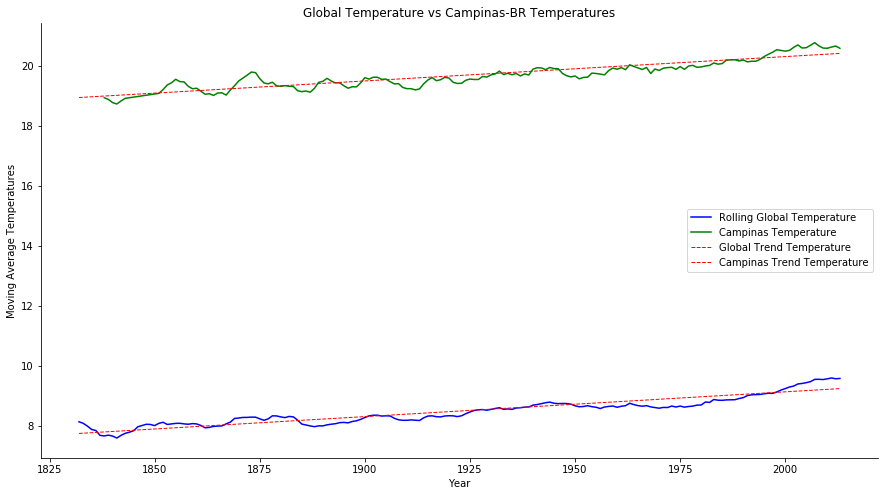

In [305]:
fig = plt.figure(figsize=(15,8))

global_camp = global_temp[(global_temp['year'] >= 1832) & (global_temp['year'] <= 2013)]

plt.plot(global_camp['year'], global_camp['MA'], c='blue', label='Rolling Global Temperature')
plt.plot(campinas_temp['year'], campinas_temp['MA'], c='green', label='Campinas Temperature')

z = np.polyfit(global_camp['year'],global_camp['avg_temp'], 1)
p = np.poly1d(z)
plt.plot(global_camp['year'], p(global_camp['year']) ,"r--", linewidth=1, label='Global Trend Temperature')

z2 = np.polyfit(campinas_temp['year'],campinas_temp['avg_temp'], 1)
p2 = np.poly1d(z2)
plt.plot(campinas_temp['year'], p2(campinas_temp['year']) ,"r--", linewidth=1, label='Campinas Trend Temperature')

plt.title('Global Temperature vs Campinas-BR Temperatures')
plt.xlabel('Year')
plt.ylabel('Moving Average Temperatures')
plt.legend(loc='center right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)



- Campinas has been approx. 10 degrees hotter than the Global Average Temperature, on average
- Campinas average temperature has been consistent with the global average temperature over time
- Both Campinas and the Global Temperature are increasing over the years


In [248]:
df_corr = global_temp.merge(campinas_temp, on='year', suffixes=['_global', '_campinas'])

In [249]:
df_corr.corr(method='pearson')

,year,avg_temp_global,MA_global,avg_temp_campinas,MA_campinas
year,1.000000,0.878030,0.926507,0.704092,0.908633
avg_temp_global,0.878030,1.000000,0.929231,0.794454,0.902881
MA_global,0.926507,0.929231,1.000000,0.730874,0.960178
avg_temp_campinas,0.704092,0.794454,0.730874,1.000000,0.740857
MA_campinas,0.908633,0.902881,0.960178,0.740857,1.000000


- The correlation between Average Global Temperature and Campina's Average temperature is 0.795, meaning there's a sightly correlation between both variables


In [250]:
df_corr

,year,avg_temp_global,MA_global,avg_temp_campinas,MA_campinas
0,1832,7.45,8.127143,18.94,NaN
1,1833,8.01,8.077143,19.93,NaN
2,1834,8.15,7.982857,19.21,NaN
3,1835,7.39,7.871429,18.62,NaN
4,1836,7.70,7.837143,18.84,NaN
...,...,...,...,...,...
170,2009,9.51,9.535714,20.78,20.588571
171,2010,9.70,9.560000,20.72,20.582857
172,2011,9.52,9.588571,20.33,20.622857
173,2012,9.51,9.561429,21.02,20.657143


# Estimate Campinas Temperature with Average Global Temperatures

In [251]:
df_corr['estimate_campinas'] = df_corr['avg_temp_global'] + 11
df_corr['MA_estimate_campinas'] = df_corr.iloc[:,5].rolling(window=7).mean()

In [252]:
df_corr

,year,avg_temp_global,MA_global,avg_temp_campinas,MA_campinas,estimate_campinas,MA_estimate_campinas
0,1832,7.45,8.127143,18.94,NaN,18.45,NaN
1,1833,8.01,8.077143,19.93,NaN,19.01,NaN
2,1834,8.15,7.982857,19.21,NaN,19.15,NaN
3,1835,7.39,7.871429,18.62,NaN,18.39,NaN
4,1836,7.70,7.837143,18.84,NaN,18.70,NaN
...,...,...,...,...,...,...,...
170,2009,9.51,9.535714,20.78,20.588571,20.51,20.535714
171,2010,9.70,9.560000,20.72,20.582857,20.70,20.560000
172,2011,9.52,9.588571,20.33,20.622857,20.52,20.588571
173,2012,9.51,9.561429,21.02,20.657143,20.51,20.561429


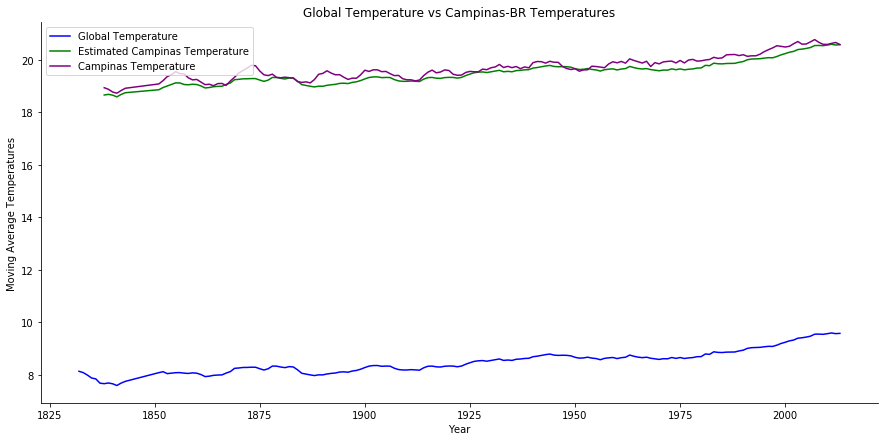

In [291]:
fig = plt.figure(figsize=(15,7))
plt.plot(df_corr['year'], df_corr['MA_global'], c='blue', label='Global Temperature')
plt.plot(df_corr['year'], df_corr['MA_estimate_campinas'], c='green', label='Estimated Campinas Temperature')
plt.plot(df_corr['year'], df_corr['MA_campinas'], c='purple', label='Campinas Temperature')
plt.title('Global Temperature vs Campinas-BR Temperatures')
plt.xlabel('Year')
plt.ylabel('Moving Average Temperatures')
plt.legend(loc='upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [254]:
df_corr.corr(method='pearson')

,year,avg_temp_global,MA_global,avg_temp_campinas,MA_campinas,estimate_campinas,MA_estimate_campinas
year,1.000000,0.878030,0.926507,0.704092,0.908633,0.878030,0.929864
avg_temp_global,0.878030,1.000000,0.929231,0.794454,0.902881,1.000000,0.930734
MA_global,0.926507,0.929231,1.000000,0.730874,0.960178,0.929231,0.998751
avg_temp_campinas,0.704092,0.794454,0.730874,1.000000,0.740857,0.794454,0.715506
MA_campinas,0.908633,0.902881,0.960178,0.740857,1.000000,0.902881,0.961302
estimate_campinas,0.878030,1.000000,0.929231,0.794454,0.902881,1.000000,0.930734
MA_estimate_campinas,0.929864,0.930734,0.998751,0.715506,0.961302,0.930734,1.000000


- We can estimate Campinas Average Temperature by adding 11 degrees in Global Average Temperature, providing a correlation of 0.795 with the average temperature value

# Plot average temperature vs global temperature for various cities

In [310]:
def compare_city(city_name):
    if city_name in city_list['city'].tolist():
        fig = plt.figure(figsize=(15,8))

        df_city = city_temp[city_temp['city'] == city_name]
        df_city['MA'] = city_temp.iloc[:,3].rolling(window=7).mean()

        df_global = global_temp[(global_temp['year'] >= df_city['year'].min()) & (global_temp['year'] <= df_city['year'].max())]

        plt.plot(df_global['year'], df_global['MA'], c='blue', label='Rolling Global Temperature')
        plt.plot(df_city['year'], df_city['MA'], c='green', label= city_name +' Temperature')
        plt.title('Global Temperature vs {}-{} Temperatures'.format(city_name, city_list[city_list['city'] == city_name]['country'].to_string(index=False)))
        plt.xlabel('Year')
        plt.ylabel('Moving Average Temperatures')
        plt.legend(loc='upper right')
    else:
        print('Invalid city name')

C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


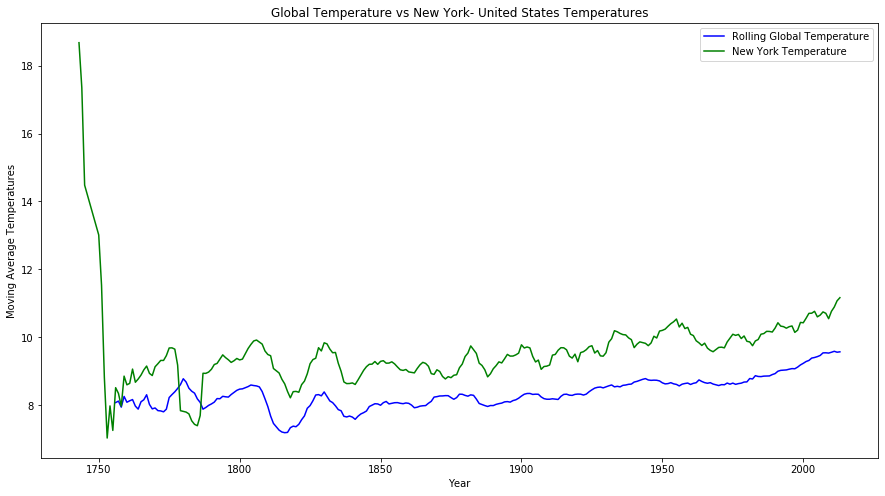

In [311]:
compare_city('New York')